In [1]:
import numpy as np

In [2]:
X_t=np.arange(-10,10,0.1).reshape(-1,1)
Y_t_original=np.sin(X_t)
Y_t= Y_t_original + 0.075*np.random.randn(*Y_t_original.shape)

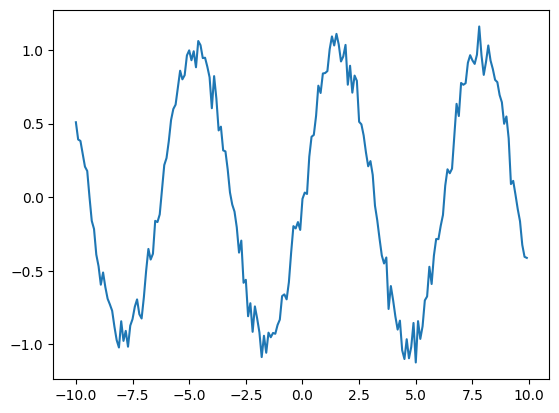

In [3]:
import matplotlib.pyplot as plt
plt.plot(X_t,Y_t)
plt.show()

In [12]:
class RNN:
    def __init__(self,X_t,n_neurons):
        self.T=X_t.shape[0]
        self.X_t=X_t
        self.Y_hat=np.zeros((self.T,1))
        self.n_neurons=n_neurons
        self.W_x=0.1*np.random.randn(self.n_neurons,1)
        self.W_h=0.1*np.random.randn(self.n_neurons,self.n_neurons)
        self.W_y=0.1*np.random.randn(1,self.n_neurons)
        self.biases=0.1*np.random.randn(self.n_neurons,1)
        self.H=[np.zeros((self.n_neurons,1)) for t in range(self.T+1)]
        
    def forward(self,xt,ht_1):
        out=np.dot(self.W_x,xt)+np.dot(self.W_h,ht_1)+self.biases
        ht=np.tanh(out)
        y_ht=np.dot(self.W_y,ht)
        return ht,y_ht,out
        

In [22]:
rnn=RNN(X_t,500)
ht=rnn.H[0]
for t,xt in enumerate(X_t):
    xt=xt.reshape(1,1)
    [ht,y_ht,out]=rnn.forward(xt,ht)
    rnn.H[t+1]=ht
    rnn.Y_hat[t]=y_ht

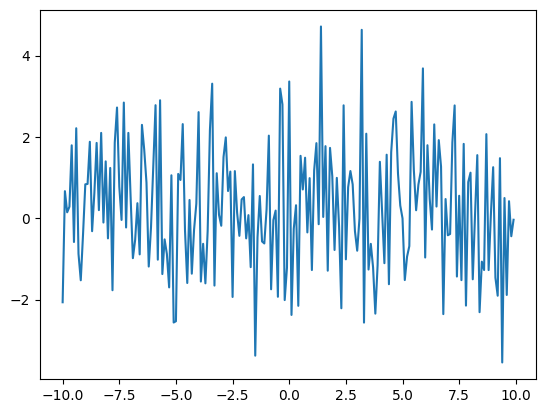

In [23]:
import matplotlib.pyplot as plt
plt.plot(X_t,rnn.Y_hat)
plt.show()